In [11]:
import pandas as pd

print(f"\n--- {csv.upper()} ---")
df = pd.read_csv('data.csv')
print(df.head(3))  # just show 3 rows to keep it clean
print(f"shape: {df.shape}")


--- DATA ---
       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   

    original_title                                           overview  \
0        Inception  Cobb, a skilled thief who commits corporate es...   
1     Interstellar  The adventures of a group of explorers who mak...   
2  The Dark Knight  Batman raises the stakes in his war on crime. ...   

  popularity                       poster_path  \
0     83.952  /oYuLEt3zVCKq57qu2F8dT7

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# load the data
df = pd.read_csv('data.csv')

# drop the columns we don't need
cols_to_drop = ['backdrop_path', 'poster_path', 'popularity', 'tagline']
df = df.drop(columns=cols_to_drop)

df = df[
    (pd.notna(df['release_date'])) & 
    (pd.to_datetime(df['release_date']) < pd.to_datetime('2024-01-01')) &
    (pd.notna(df['production_companies'])) & 
    (df['revenue'] < 3.1e9)
]

In [28]:
# find movies with crazy runtimes
crazy_runtime = df[df['runtime'] > 300].sort_values(by='runtime', ascending=False)
print(crazy_runtime[['title', 'runtime', 'release_date', 'revenue']].head(10))

# quick stats on runtime
print(f"\nRuntime stats:")
print(f"Min: {df['runtime'].min()}")
print(f"Max: {df['runtime'].max()}")
print(f"Mean: {df['runtime'].mean():.2f}")
print(f"Median: {df['runtime'].median()}")
print(f"95th percentile: {df['runtime'].quantile(0.95)}")

                                                     title  runtime  \
103543                                           Cinématon    12480   
288767                                        Beijing 2003     9000   
102859                                        #ALLMYMOVIES     4320   
782593                                       Boys-N-Toys 2     2009   
1119277                                      My Human Time     1440   
790708                           A History of European Art     1439   
787570   Hollywood Remembers - Hollywoods Greatest Scre...     1273   
828389                                       The Innocence     1265   
180397                               200 Colossal Cartoons     1230   
237292                                  Best Asses Ever! 2     1200   

        release_date  revenue  
103543    1978-12-20        0  
288767    2004-01-01        0  
102859    2015-11-12        0  
782593    2009-09-22        0  
1119277   2014-09-05        0  
790708    2005-01-01      

In [29]:
# check out the shorties
short_stuff = df[(df['runtime'] > 0) & (df['runtime'] < 60)].sort_values(by='runtime')
print(short_stuff[['title', 'runtime', 'release_date', 'revenue']].head(10))

# how many we talkin?
print(f"\nshort movies count: {len(short_stuff)}")
print(f"shorts making $$$: {len(short_stuff[short_stuff['revenue'] > 0])}")

                                                     title  runtime  \
186328                                         Pas de deux        1   
295608                                  A Terrible Mistake        1   
295614          Paris : général Saussier et son état-major        1   
295629                        Paris : dragons de l’escorte        1   
967394                    Cuirassés de l'escadre italienne        1   
868112                Repairing the Broken Bridge at Frere        1   
730334                                           Dodgeball        1   
967396   Inauguration du monument de Victor-Emmanuel à ...        1   
455203                                    Spooky Stairwell        1   
1036643                                           Suicidio        1   

        release_date  revenue  
186328    1902-10-11        0  
295608    2023-10-31        0  
295614    1896-10-09        0  
295629    1896-10-08        0  
967394    1899-04-14        0  
868112    1899-12-01      

In [30]:
df_clean = df[
    (df['runtime'] >= 30) & 
              (df['runtime'] <= 280) & 
              (df['revenue'] > 1000) &
              pd.notna(df['release_date'])]
print(f"went from {df.shape[0]} to {df_clean.shape[0]} rows")

went from 492772 to 14853 rows


/var/folders/ky/xc03k_hx12j3t7fq6f7by3600000gn/T/ipykernel_4958/962664022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')
/var/folders/ky/xc03k_hx12j3t7fq6f7by3600000gn/T/ipykernel_4958/962664022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['release_year'] = df_clean['release_date'].dt.year
/var/folders/ky/xc03k_hx12j3t7fq6f7by3600000gn/T/ipykernel_4958/962664022.py:4: SettingWithCopyWarning: 
A value is

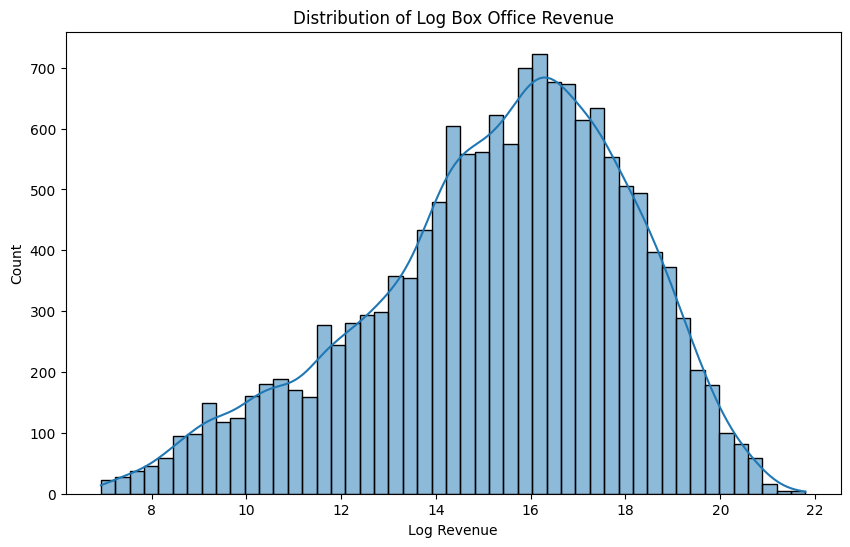

/var/folders/ky/xc03k_hx12j3t7fq6f7by3600000gn/T/ipykernel_4958/962664022.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, x='revenue', y='title', palette='viridis')


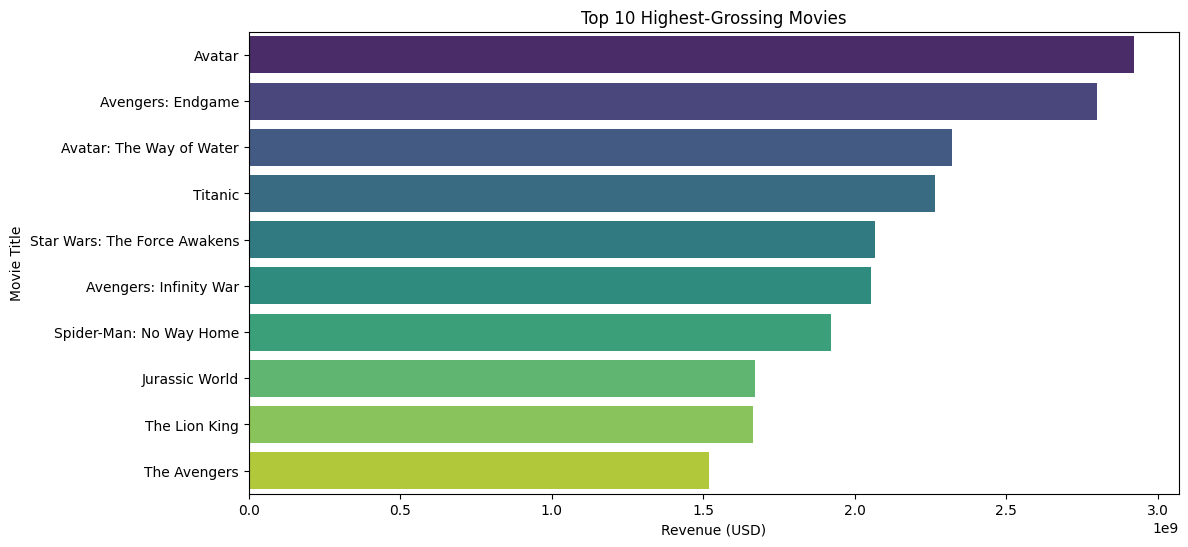

/var/folders/ky/xc03k_hx12j3t7fq6f7by3600000gn/T/ipykernel_4958/962664022.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['genre_list'] = df_clean['genres'].str.split(', ')
/var/folders/ky/xc03k_hx12j3t7fq6f7by3600000gn/T/ipykernel_4958/962664022.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.values, y=genre_means.index, palette='rocket')


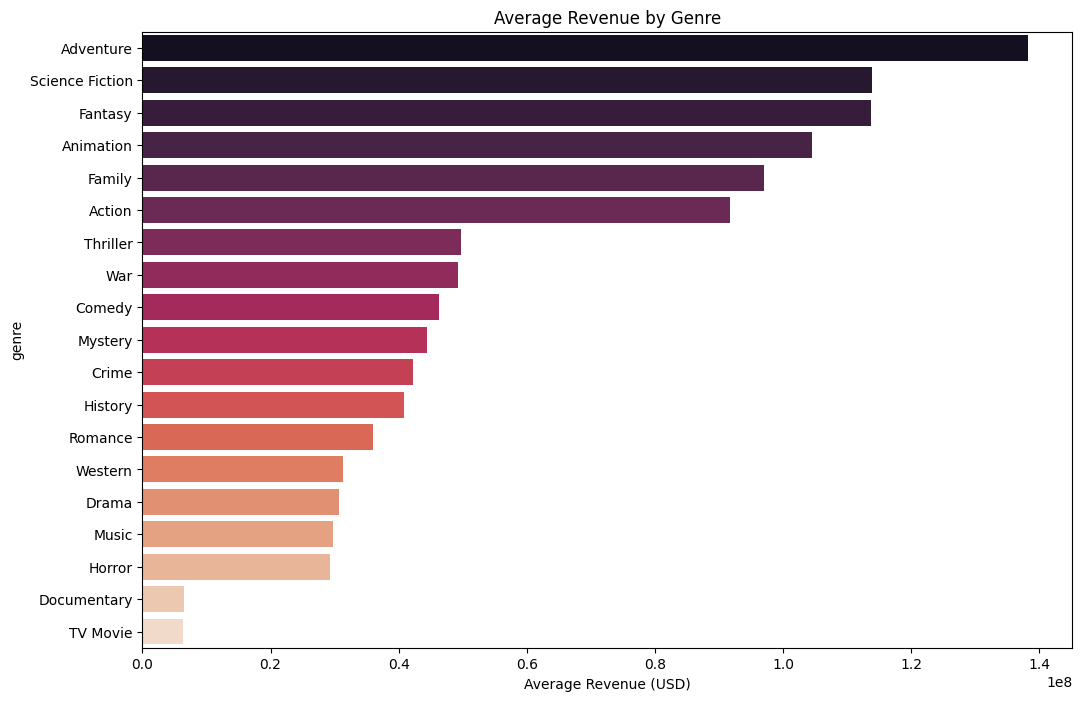

/var/folders/ky/xc03k_hx12j3t7fq6f7by3600000gn/T/ipykernel_4958/962664022.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_revenue, x='release_month', y='revenue', palette='cool')


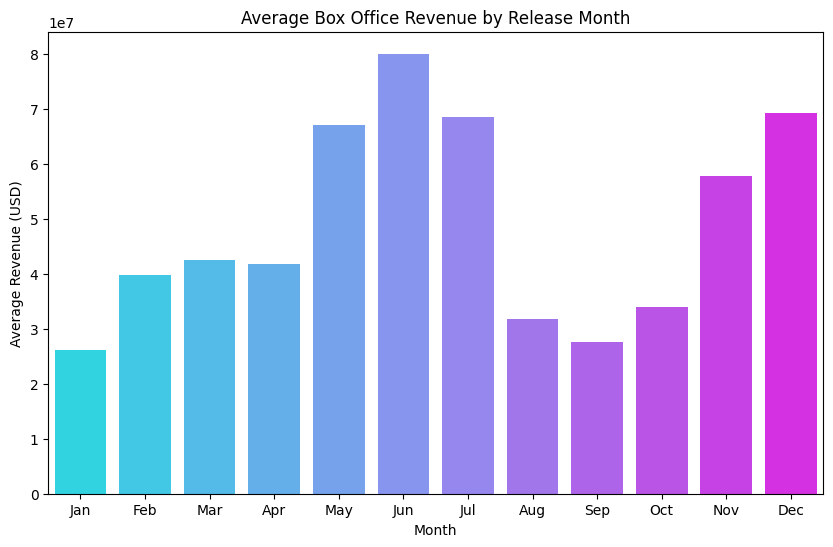

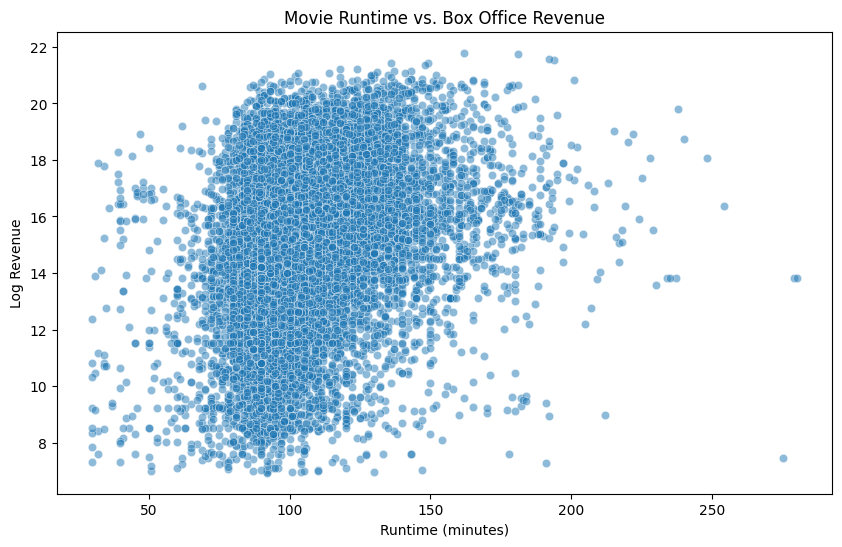

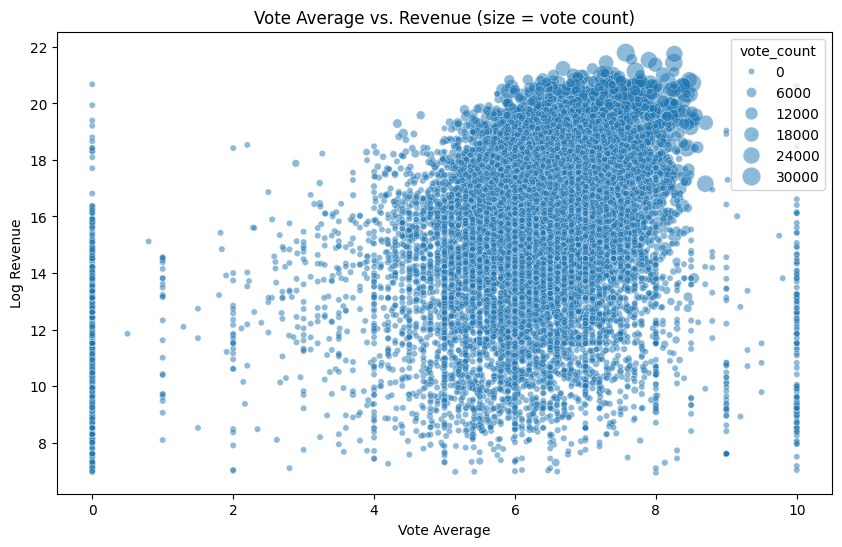

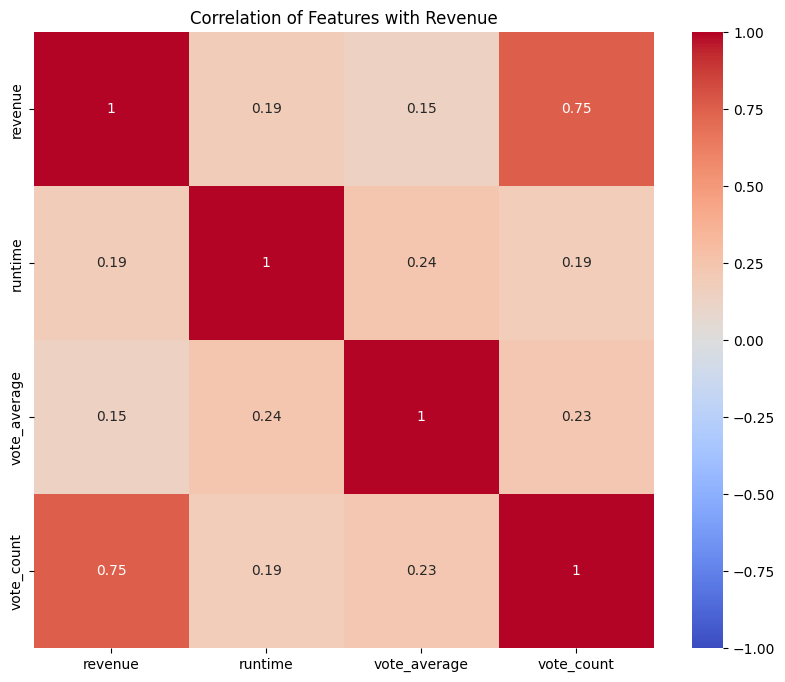

In [31]:


# convert release_date to datetime
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')
df_clean['release_year'] = df_clean['release_date'].dt.year
df_clean['release_month'] = df_clean['release_date'].dt.month

# quick look at revenue distribution
plt.figure(figsize=(10, 6))
# log transform revenue (it's usually very skewed)
df_clean['log_revenue'] = np.log1p(df_clean['revenue'])
sns.histplot(df_clean['log_revenue'].dropna(), kde=True)
plt.title('Distribution of Log Box Office Revenue')
plt.xlabel('Log Revenue')
plt.show()

# top 10 highest-grossing movies
top_movies = df_clean.nlargest(10, 'revenue')[['title', 'revenue', 'release_year']]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_movies, x='revenue', y='title', palette='viridis')
plt.title('Top 10 Highest-Grossing Movies')
plt.xlabel('Revenue (USD)')
plt.ylabel('Movie Title')
plt.show()

# revenue by genre (need to split the genre string)
df_clean['genre_list'] = df_clean['genres'].str.split(', ')
genre_data = []
for idx, row in df_clean.iterrows():
    if isinstance(row['genre_list'], list):
        for genre in row['genre_list']:
            genre_data.append({'genre': genre, 'revenue': row['revenue']})

genre_df = pd.DataFrame(genre_data)
genre_means = genre_df.groupby('genre')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_means.values, y=genre_means.index, palette='rocket')
plt.title('Average Revenue by Genre')
plt.xlabel('Average Revenue (USD)')
plt.show()

# revenue by release month (seasonality)
monthly_revenue = df_clean.groupby('release_month')['revenue'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_revenue, x='release_month', y='revenue', palette='cool')
plt.title('Average Box Office Revenue by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue (USD)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# runtime vs revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='runtime', y='log_revenue', alpha=0.5)
plt.title('Movie Runtime vs. Box Office Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Log Revenue')
plt.show()

# correlation between vote metrics and revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='vote_average', y='log_revenue', size='vote_count', sizes=(20, 200), alpha=0.5)
plt.title('Vote Average vs. Revenue (size = vote count)')
plt.xlabel('Vote Average')
plt.ylabel('Log Revenue')
plt.show()

# correlation heatmap of numerical features
numeric_cols = ['revenue', 'runtime', 'vote_average', 'vote_count']
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Revenue')
plt.show()